In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
df = pd.read_csv(r'C:\Users\mailg\Documents\GitHub\Tesla-Stock-Price-Prediction-Model\Dataset\Tesla.csv - Tesla.csv.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df.head

<bound method NDFrame.head of            Date        Open        High         Low       Close    Volume  \
0     6/29/2010   19.000000   25.000000   17.540001   23.889999  18766300   
1     6/30/2010   25.790001   30.420000   23.299999   23.830000  17187100   
2      7/1/2010   25.000000   25.920000   20.270000   21.959999   8218800   
3      7/2/2010   23.000000   23.100000   18.709999   19.200001   5139800   
4      7/6/2010   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998   3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000   7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996   4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988   7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1      

In [5]:
df.shape

(1692, 7)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

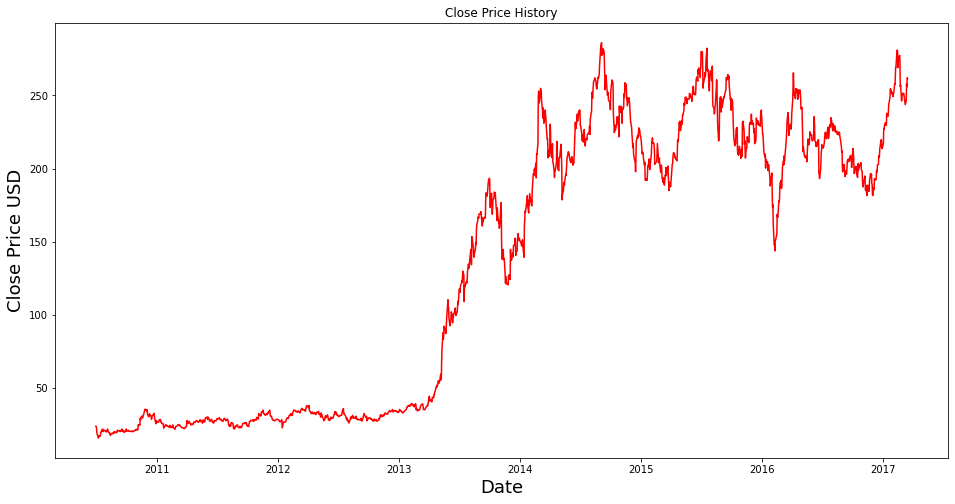

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

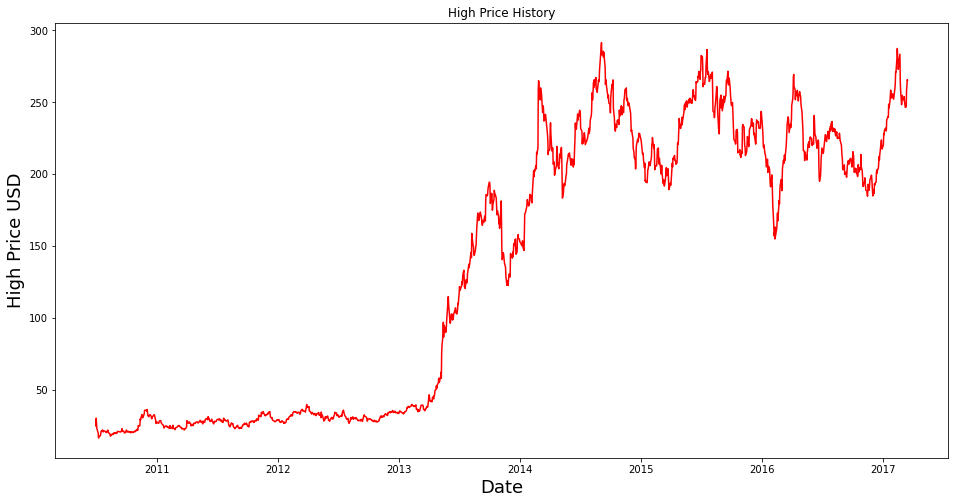

In [24]:
plt.figure(figsize=(16,8))
plt.title('High Price History')
plt.plot(df['High'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD', fontsize = 18)
plt.show()

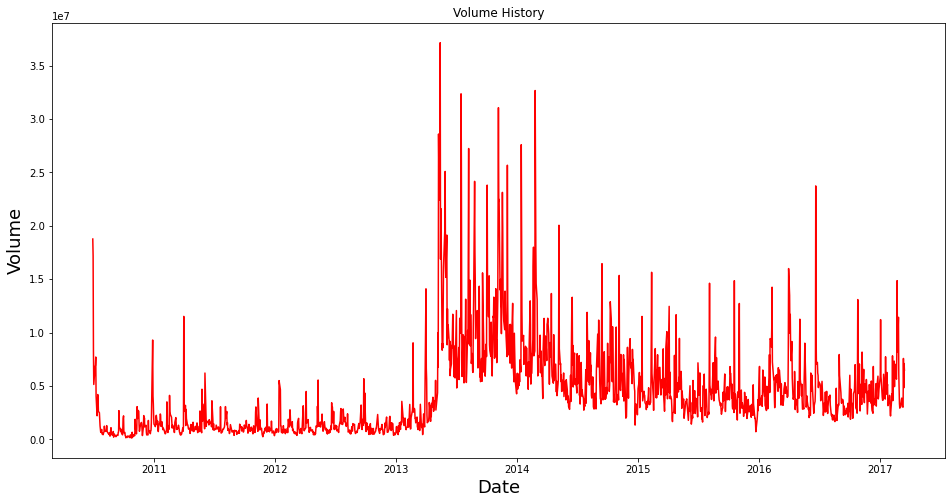

In [26]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(df['Volume'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize = 18)
plt.show()

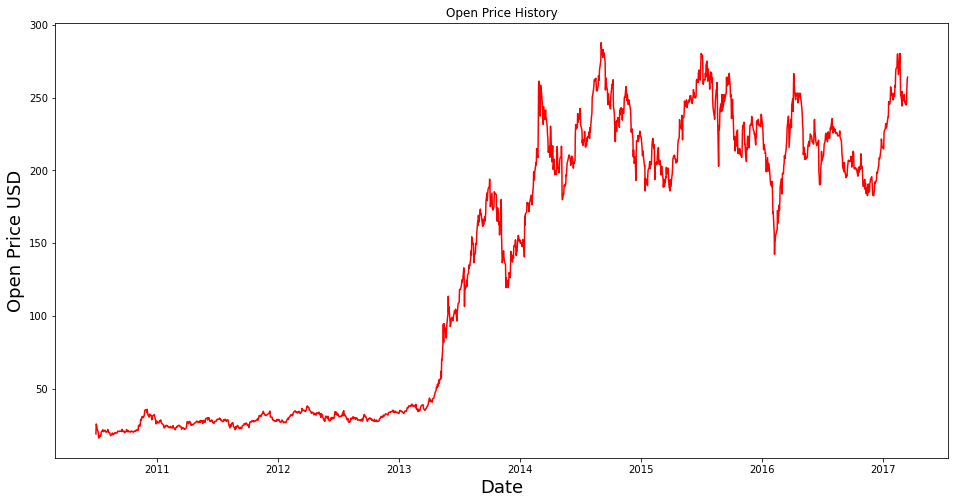

In [25]:
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(df['Open'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD', fontsize = 18)
plt.show()

In [8]:
data = df.filter(['Close'])
dataset = data.values 
training_data_len = math.ceil(len(dataset)*.8)  

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [10]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [11]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 31s 21ms/step - loss: 0.0036
Epoch 2/10
1294/1294 [==============================] - 28s 22ms/step - loss: 0.0015
Epoch 3/10
1294/1294 [==============================] - 30s 23ms/step - loss: 8.8712e-04
Epoch 4/10
1294/1294 [==============================] - 32s 24ms/step - loss: 9.9591e-04
Epoch 5/10
1294/1294 [==============================] - 31s 24ms/step - loss: 6.4500e-04
Epoch 6/10
1294/1294 [==============================] - 29s 22ms/step - loss: 6.6851e-04
Epoch 7/10
1294/1294 [==============================] - 30s 23ms/step - loss: 5.7840e-04
Epoch 8/10
1294/1294 [==============================] - 30s 23ms/step - loss: 5.8320e-04
Epoch 9/10
1294/1294 [==============================] - 28s 22ms/step - loss: 5.9277e-04
Epoch 10/10
1294/1294 [==============================] - 27s 21ms/step - loss: 5.8460e-04


In [16]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 14ms/step


In [20]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.216281458805245

C:\Users\mailg\AppData\Local\Temp\ipykernel_15480\336307139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


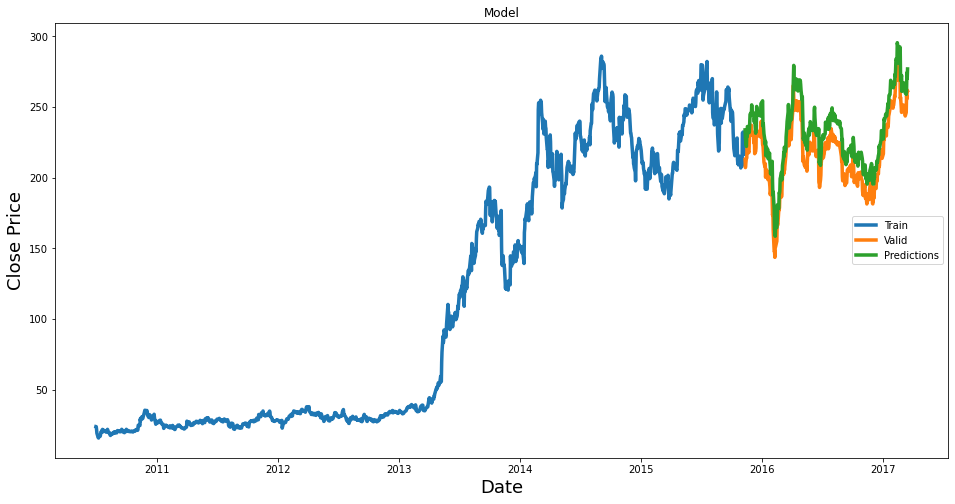

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='center right')

In [22]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,233.869553
2015-11-13,207.190002,227.662689
2015-11-16,214.309998,222.146912
2015-11-17,214.000000,229.950714
2015-11-18,221.070007,229.130402
...,...,...
2017-03-13,246.169998,258.997314
2017-03-14,258.000000,261.804565
2017-03-15,255.729996,274.308167


In [23]:
tesla_quote = pd.read_csv(r'C:\Users\mailg\Documents\GitHub\Tesla-Stock-Price-Prediction-Model\Dataset\Tesla.csv - Tesla.csv.csv')

new_df = tesla_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

pred_price= model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 21ms/step


array([[275.5277]], dtype=float32)